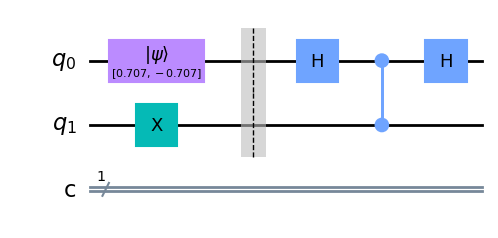

In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi
import numpy as np
from qiskit.visualization import plot_state_city, plot_bloch_multivector, plot_histogram
from qiskit import *

qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)
circuit.initialize([1/np.sqrt(2), -1/np.sqrt(2)], 0)

circuit.x(qreg_q[1])

circuit.barrier(qreg_q[0], qreg_q[1])
circuit.h(qreg_q[0])
circuit.cz(qreg_q[0], qreg_q[1])
circuit.h(qreg_q[0])
circuit.draw(output="mpl")

{'1': 509, '0': 491}


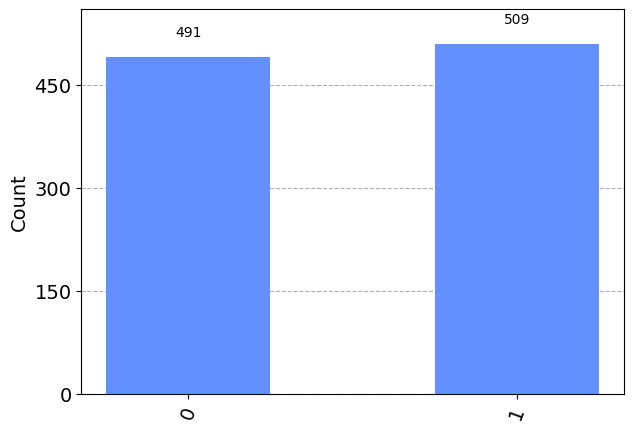

In [2]:
circuit.measure(qreg_q[0], creg_c[0])
backend = BasicAer.get_backend('qasm_simulator') # the device to run on
result = backend.run(transpile(circuit, backend), shots=1000).result()
counts  = result.get_counts(circuit)
print(counts)
plot_histogram(counts)